In [12]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


In [0]:
show_n_images=25
import os
from glob import glob 
import  matplotlib.pyplot as plt

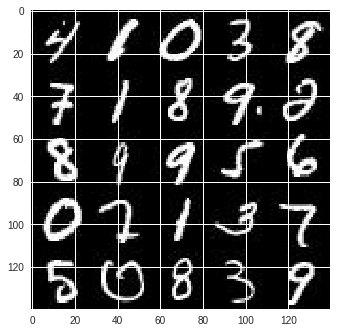

In [14]:
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
plt.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')


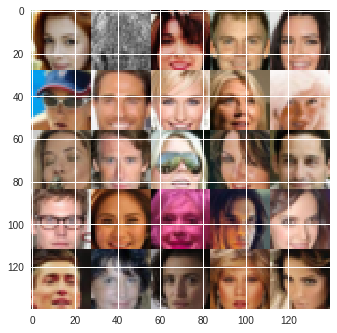

In [15]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
face_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
plt.imshow(helper.images_square_grid(face_images, 'RGB'))


In [16]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.13.1
Default GPU Device: /device:GPU:0


In [17]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    real_input=tf.placeholder(tf.float32,(None,image_width,image_height,image_channels),name='real_input')
    z_input=tf.placeholder(tf.float32,(None,z_dim),name='z_input')
    learning_rate=tf.placeholder(tf.float32)
    return real_input, z_input, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)


Tests Passed


In [191]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    
    with tf.variable_scope('discriminator',reuse=reuse):
      #conv1
      conv1=tf.layers.conv2d(images,64,3,strides=2,padding='same',use_bias=False)
      conv1=tf.nn.leaky_relu(conv1)
      #conv2
     
      conv2_2=tf.layers.conv2d(conv1,128,3,strides=2,padding='same',use_bias=False)
      conv2_2=tf.layers.batch_normalization(conv2_2,training=True)
      conv2_2=tf.nn.leaky_relu(conv2_2)
      #conv3
      conv2_2=tf.layers.conv2d(conv2_2,256,3,strides=1,padding='same',use_bias=False)
      conv2_2=tf.layers.batch_normalization(conv2_2,training=True)
      conv2_2=tf.nn.leaky_relu(conv2_2)
      
      
             
      #reshape the images
      flat=tf.layers.flatten(conv2_2)
      logits=tf.layers.dense(flat,1)
      out=tf.sigmoid(logits)
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)


Tests Passed


In [199]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator',reuse=not is_train):
      weights=tf.contrib.layers.xavier_initializer_conv2d()
      x=tf.layers.dense(z,2*2*512)
      x=tf.reshape(x,(-1,2,2,512))
      x=tf.layers.batch_normalization(x,training=is_train)
      x=tf.nn.leaky_relu(x)
      #conv1
      """"
      conv1=tf.layers.conv2d_transpose(x,512,3,strides=2,padding='valid',kernel_initializer=weights)
      conv1=tf.layers.batch_normalization(conv1,training=is_train)
      conv1=tf.nn.leaky_relu(conv1)
      """
      #conv2_1
      conv2_1=tf.layers.conv2d_transpose(x,256,5,strides=2,padding='valid',use_bias=False)
      conv2_1=tf.layers.batch_normalization(conv2_1,training=is_train)
      conv2_1=tf.nn.leaky_relu(conv2_1)
      
      #conv3_1
      conv3_1=tf.layers.conv2d_transpose(conv2_1,128,3,strides=2,padding='same',use_bias=False)
      conv3_1=tf.layers.batch_normalization(conv3_1,training=is_train)
      conv3_1=tf.nn.leaky_relu(conv3_1)
      
      #conv4_1
      conv4_1=tf.layers.conv2d_transpose(conv3_1,64,3,strides=2,padding='same',use_bias=False)
      conv4_1=tf.layers.batch_normalization(conv4_1,training=is_train)
      conv4_1=tf.nn.leaky_relu(conv4_1)
      #conv4_2
      
      logits=tf.layers.conv2d_transpose(conv4_1,out_channel_dim,5,strides=1,padding='same')
      out=tf.tanh(logits)
      
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


In [200]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model=generator(input_z,out_channel_dim)
    d_model_real,d_logits_real=discriminator(input_real)
    d_model_fake,d_logits_fake=discriminator(g_model,reuse=True)
    d_real_loss=tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real,labels=tf.ones_like(d_model_real)*0.9))
    d_fake_loss=tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,labels=tf.zeros_like(d_model_fake)))
    d_loss=d_real_loss+d_fake_loss
    g_loss=tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,labels=tf.ones_like(d_model_fake)*0.9))


    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


In [201]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars=tf.trainable_variables()
    d_var=[var for var in t_vars if var.name.startswith('discriminator')]
    g_var=[var for var in t_vars if var.name.startswith("generator")]
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
      d_opt=tf.train.AdamOptimizer(learning_rate=learning_rate,beta1=beta1).minimize(d_loss,var_list=d_var)
      g_opt=tf.train.AdamOptimizer(learning_rate=learning_rate,beta1=beta1).minimize(g_loss,var_list=g_var)
    
    
    
    
    return d_opt, g_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)


Tests Passed


In [0]:

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    plt.imshow(images_grid, cmap=cmap)
    plt.show()

In [0]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    """
    _ , img_w, img_h, img_d = data_shape
    input_real, input_z, lr = model_inputs(img_w, img_h, img_d, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, img_d)
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                
                # values range from -0.5 to 0.5, therefore scale to range -1, 1
                batch_images = batch_images * 2
                steps += 1
            
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                
                if steps % 400 == 0:
                    # At the end of every 10 epochs, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    
                    _ = show_generator_output(sess, 4, input_z, data_shape[3],data_image_mode)

In [179]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

TypeError: ignored

Epoch 1/2... Discriminator Loss: 0.5094... Generator Loss: 3.2661


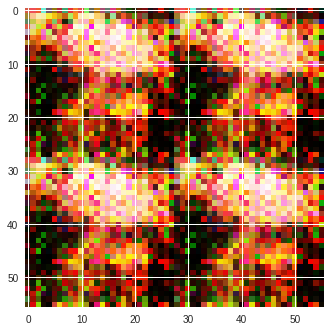

Epoch 1/2... Discriminator Loss: 0.4384... Generator Loss: 2.5444


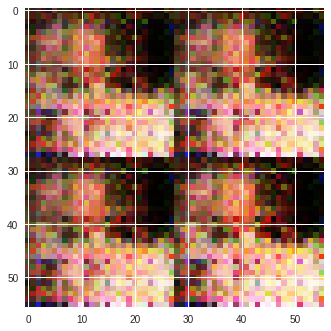

Epoch 1/2... Discriminator Loss: 1.3651... Generator Loss: 3.9555


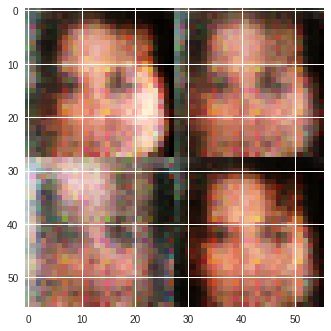

Epoch 1/2... Discriminator Loss: 0.6677... Generator Loss: 1.9400


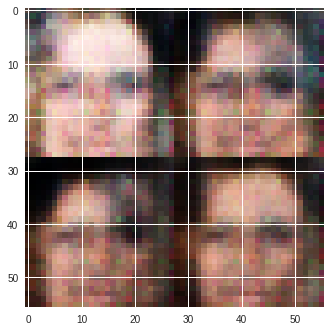

Epoch 1/2... Discriminator Loss: 0.7801... Generator Loss: 1.8652


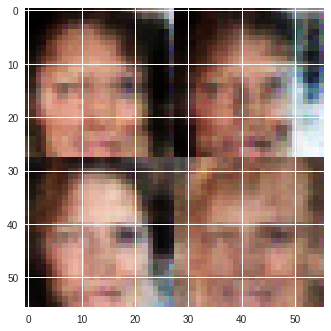

Epoch 1/2... Discriminator Loss: 1.2491... Generator Loss: 2.5015


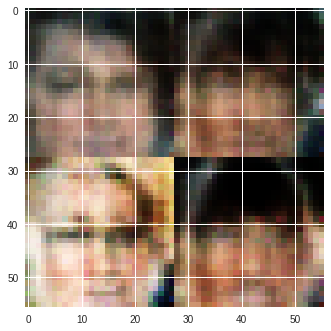

Epoch 1/2... Discriminator Loss: 1.2205... Generator Loss: 1.7182


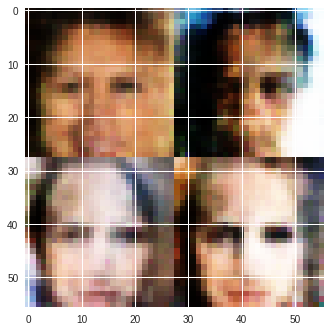

Epoch 2/2... Discriminator Loss: 1.0456... Generator Loss: 0.8969


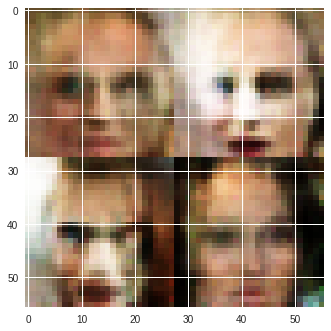

Epoch 2/2... Discriminator Loss: 0.9612... Generator Loss: 1.4215


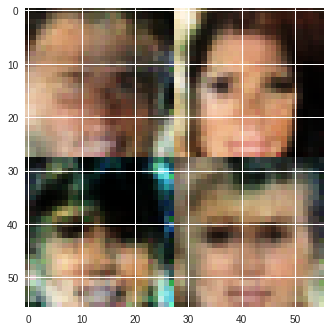

Epoch 2/2... Discriminator Loss: 0.9444... Generator Loss: 1.0479


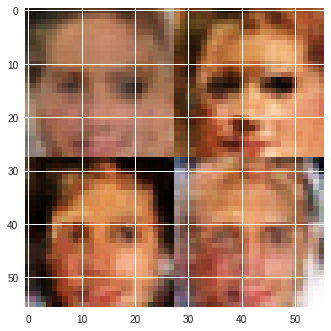

Epoch 2/2... Discriminator Loss: 0.8685... Generator Loss: 1.2401


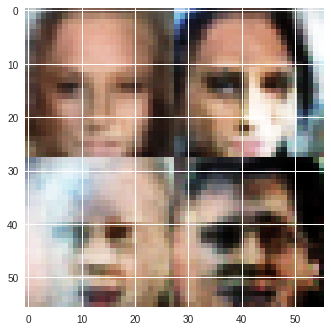

Epoch 2/2... Discriminator Loss: 1.3831... Generator Loss: 0.6019


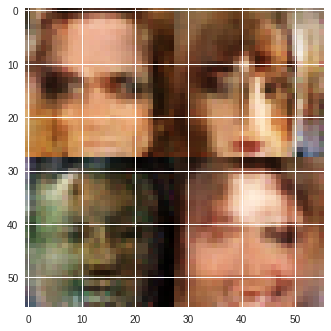

Epoch 2/2... Discriminator Loss: 1.1737... Generator Loss: 0.9130


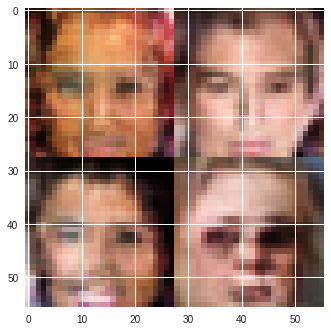

Epoch 2/2... Discriminator Loss: 1.0431... Generator Loss: 0.9399


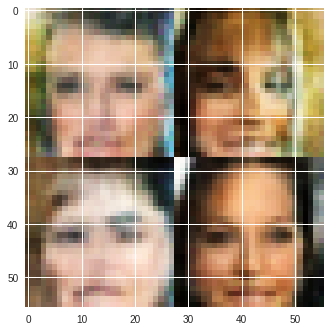

Epoch 2/2... Discriminator Loss: 1.1246... Generator Loss: 1.3322


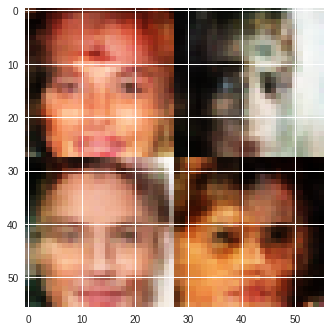

In [204]:
batch_size = 64
z_dim = 150
learning_rate =0.0002
beta1 = 0.5

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs =2

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)
